INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de la segmentation d'une image en superpixels SLIC

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture d'une image.

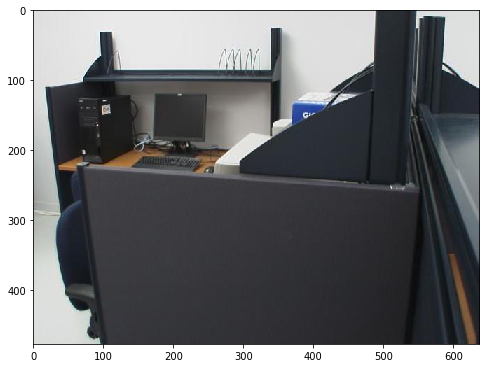

In [2]:
image = cv2.imread('bureau.jpg')
plt.figure(figsize = (8,8))
image = image[:,:,::-1] #OpenCV lit les images en BGR
plt.imshow(image)
plt.show()

Application de la méthode SLIC

In [3]:
taille = 30
slicseg = cv2.ximgproc.createSuperpixelSLIC(image, cv2.ximgproc.SLICO, taille)
slicseg.iterate()

Affichage du résultats

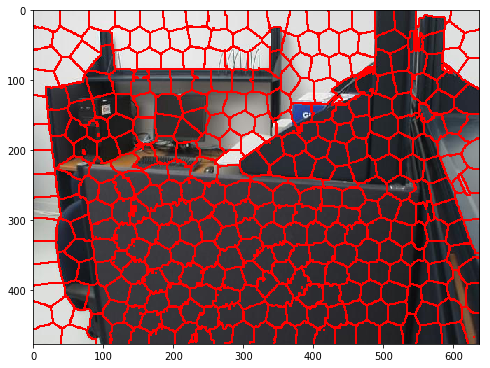

In [4]:
# Masque des contours des superpixels
mask = slicseg.getLabelContourMask()
# Épaississement des contours pour meilleure visualisation
kernel = np.ones((3,3),np.uint8)
mask = cv2.dilate(mask,kernel,iterations = 1)

plt.figure(figsize = (8,8))
Imagecontour = np.zeros_like(image, np.uint8)
# Création d'un image rouge
Imagecontour[:] = (255, 0, 0)
# Trace les contours en rouge avec le masque, et l'intérieur des superpixels avec le complément du masque.
mask_inv = cv2.bitwise_not(mask)
result_contour = cv2.bitwise_and(Imagecontour, Imagecontour, mask = mask)
result_interieur = cv2.bitwise_and(image, image, mask = mask_inv)

result = cv2.add(result_contour, result_interieur)
plt.imshow(result)
plt.show()